# Holt Winter’s Exponential Smoothing

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Reading in CDC hospitalization data

In [40]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Total ILI']]
list_data = list(df_hospital['Total ILI'])

In [41]:
list_data = list(df_hospital['Total ILI'])

#### Defining the HWES model - forecasting the last 52 weeks

In [42]:
model = ExponentialSmoothing(list_data[:-52], seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [43]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - future - 1, len(list_data) + future - 1))

In [44]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2015-2016 to 2018-2019 + predictions')

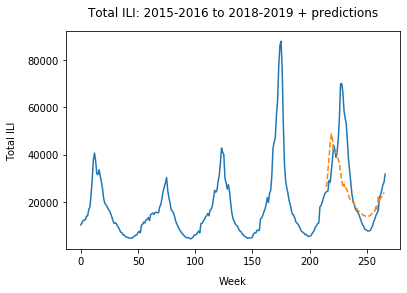

In [45]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2015-2016 to 2018-2019 + predictions", pad=15)

In [46]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,215
Model:,ExponentialSmoothing,SSE,2148974061.835
Optimized:,True,AIC,3573.288
Trend:,None,BIC,3755.302
Seasonal:,Additive,AICC,3613.693
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,22:55:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True


#### Defining the HWES model - forecasting the next 52 weeks

In [63]:
model = ExponentialSmoothing(list_data, seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [64]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - 1, len(list_data) + future))

In [65]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2015-2016 to 2018-2019 + predictions')

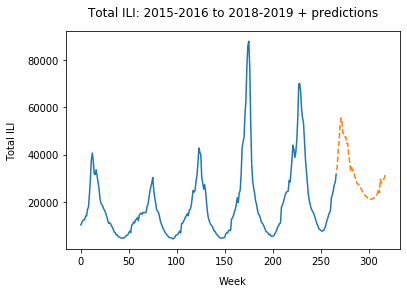

In [66]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2015-2016 to 2018-2019 + predictions", pad=15)

In [51]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,267
Model:,ExponentialSmoothing,SSE,2865386420.113
Optimized:,True,AIC,4430.388
Trend:,None,BIC,4624.100
Seasonal:,Additive,AICC,4460.788
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,22:55:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True


### Predicting a previous year

In [52]:
model = ExponentialSmoothing(list_data[:-104], seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [53]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - 105, len(list_data) + 104 - 1))

In [54]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2015-2016 to 2018-2019 + predictions')

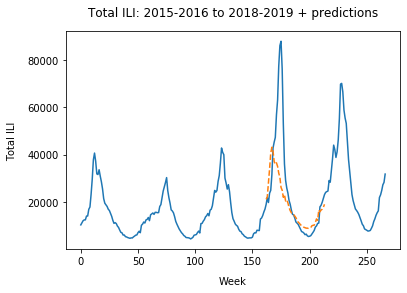

In [55]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2015-2016 to 2018-2019 + predictions", pad=15)

In [56]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,163
Model:,ExponentialSmoothing,SSE,716301439.208
Optimized:,True,AIC,2601.225
Trend:,None,BIC,2768.288
Seasonal:,Additive,AICC,2661.452
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,22:55:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True


### Predicting two years prior

In [67]:
model = ExponentialSmoothing(list_data[:-156], seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [74]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - (3*future), len(list_data) - 2*future - 1))

In [75]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions (+ trained on future data)')

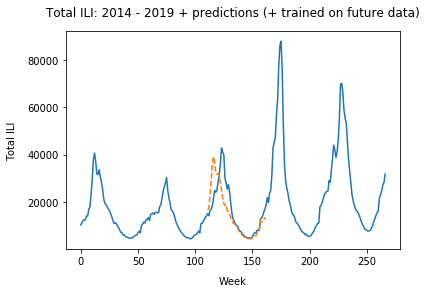

In [76]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions (+ trained on future data)", pad=15)

In [61]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,215
Model:,ExponentialSmoothing,SSE,2533632265.252
Optimized:,True,AIC,3608.691
Trend:,None,BIC,3790.705
Seasonal:,Additive,AICC,3649.096
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,22:55:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True
